In [57]:
# dependencies 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,ConfusionMatrixDisplay

In [58]:
# Loading data
file_path = Path("/Users/vickylynnmauldin/Desktop/FHLMC-MF-Loan-Performance copy/cleaned_data_final2.csv")
df = pd.read_csv(file_path)
df.head()

,cnt_mrtg_term,mrtg_status,rate_ltv,cd_fxfltr,cnt_blln_term,cnt_io_per,cnt_rsdntl_unit,code_int,rate_dcr,rate_int
0,120,1,0.77500,0,1,1,328.0,0.0,1.689556,0.0437
1,180,1,0.63194,0,1,1,352.0,0.0,1.646538,0.0461
2,84,1,0.74184,0,1,1,96.0,0.0,1.885526,0.0414
3,240,1,0.49444,1,1,0,30.0,0.0,1.353316,0.0421
4,120,1,0.69780,0,1,1,23.0,0.0,2.103800,0.0430


In [59]:
# Define features set
X = df.copy()
X.drop("mrtg_status", axis=1, inplace=True)
X.head()

,cnt_mrtg_term,rate_ltv,cd_fxfltr,cnt_blln_term,cnt_io_per,cnt_rsdntl_unit,code_int,rate_dcr,rate_int
0,120,0.77500,0,1,1,328.0,0.0,1.689556,0.0437
1,180,0.63194,0,1,1,352.0,0.0,1.646538,0.0461
2,84,0.74184,0,1,1,96.0,0.0,1.885526,0.0414
3,240,0.49444,1,1,0,30.0,0.0,1.353316,0.0421
4,120,0.69780,0,1,1,23.0,0.0,2.103800,0.0430


In [60]:
# Define target vector
y = df["mrtg_status"].values.reshape(-1, 1)
y[:5]


array([[1],
       [1],
       [1],
       [1],
       [1]])

In [61]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [62]:
# Create the StandardScaler instance
scaler = StandardScaler()

# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [63]:
X_train_scaled

array([[-0.38458704, -3.16453754, -0.49295655, ..., -0.34761762,
        -0.42864725,  1.24316505],
       [-0.38458704,  1.00143665, -0.49295655, ..., -0.34761762,
        -0.8491095 ,  1.4312251 ],
       [-0.38458704,  1.1897218 , -0.49295655, ..., -0.34761762,
         0.01375441, -0.33183786],
       ...,
       [-0.27836925, -0.58132165, -0.49295655, ..., -0.34761762,
         0.09372901, -0.06150154],
       [-0.38458704,  0.74883321, -0.49295655, ..., -0.34761762,
         0.19680706, -0.90777177],
       [-0.38458704,  0.67632096, -0.49295655, ...,  2.87672414,
         0.73314876, -1.76853437]])

In [64]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=1000, random_state=42)

In [65]:
# Fit the model and use .ravel()on the "y_train" data. 
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

In [66]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [67]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

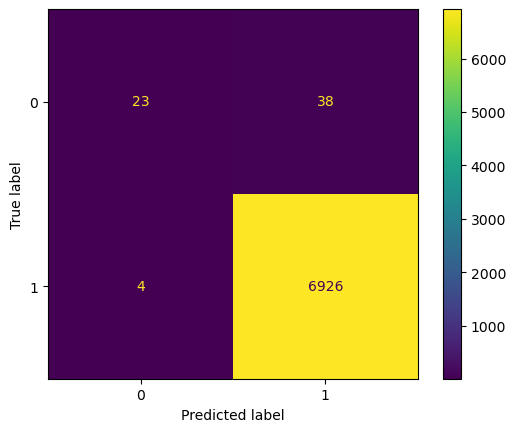

In [68]:
#confusion plot 
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=rf_model.classes_)

disp.plot()

plt.show()

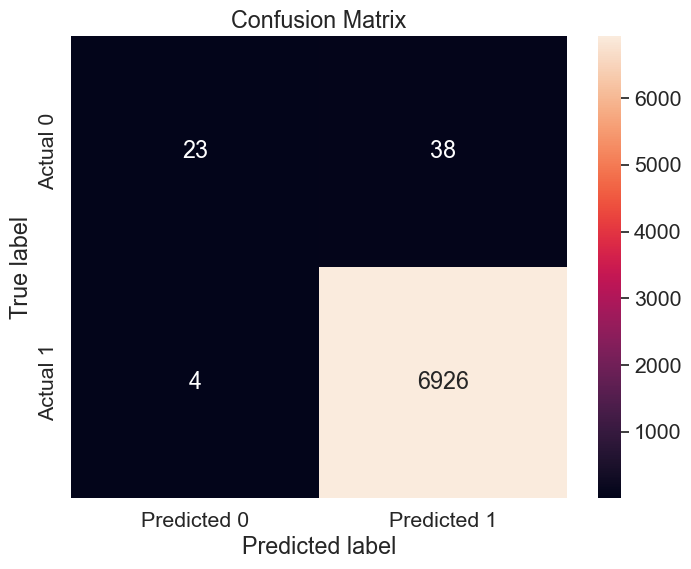

In [70]:
sns.set(font_scale=1.4)
plt.figure(figsize=(8,6))

#create heatmap
sns.heatmap(cm_df, annot=True, fmt='g')

#set plot title and axis lables
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [27]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,23,38
Actual 1,4,6926


Accuracy Score : 0.9939922757831497
Classification Report
              precision    recall  f1-score   support

           0       0.85      0.38      0.52        61
           1       0.99      1.00      1.00      6930

    accuracy                           0.99      6991
   macro avg       0.92      0.69      0.76      6991
weighted avg       0.99      0.99      0.99      6991



In [28]:
# Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.2560949652082004, 'rate_dcr'),
 (0.24344899060633426, 'rate_int'),
 (0.21005972928005678, 'rate_ltv'),
 (0.14299914316303577, 'cnt_rsdntl_unit'),
 (0.07699881005967525, 'cnt_mrtg_term'),
 (0.036865588543368966, 'cd_fxfltr'),
 (0.02060097070833773, 'cnt_io_per'),
 (0.011237501554598354, 'code_int'),
 (0.0016943008763924004, 'cnt_blln_term')]

mode has high accuracy but due to the the low recall random forest may not be the best model to use. Higher level of false positives vs ture mostives was very accurate in predicting ture negatives. 